# Models

Now import the librearies and the data

In [22]:
# Data Handling
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, accuracy_score

In [23]:
# Load the data

df = pd.read_csv('../data/processed/creditcard_cleaned.csv')

In [24]:
# Scale the variable Amount with StandardScaler

df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

In [25]:
# Split the data into X and y

X = df.drop('Class', axis=1)
y = df['Class']

In [26]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (398041, 29)
y_train: (398041,)
X_test: (170589, 29)
y_test: (170589,)


In [27]:
# Define the model

rf = RandomForestClassifier(random_state=42)

In [28]:
# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Make predictions

y_pred_rf = rf.predict(X_test)

In [30]:
# Evaluate the model

print('Random Forest')
print(classification_report(y_test, y_pred_rf))

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



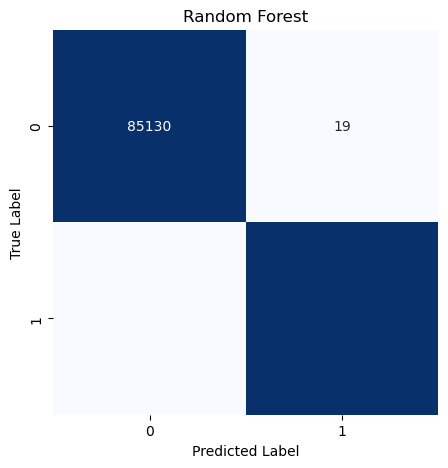

In [40]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='g', square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest')
plt.show()


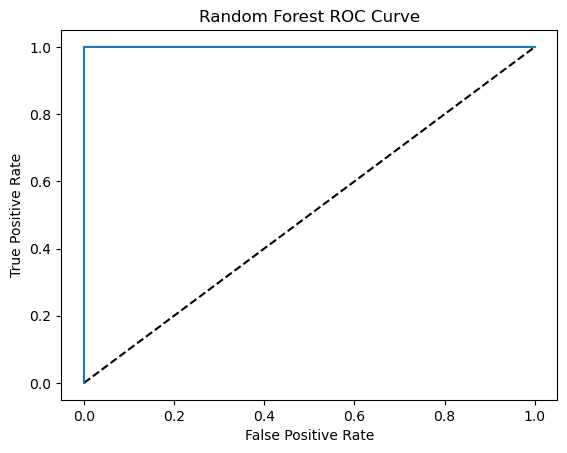

In [33]:
# Plot the ROC curve

y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

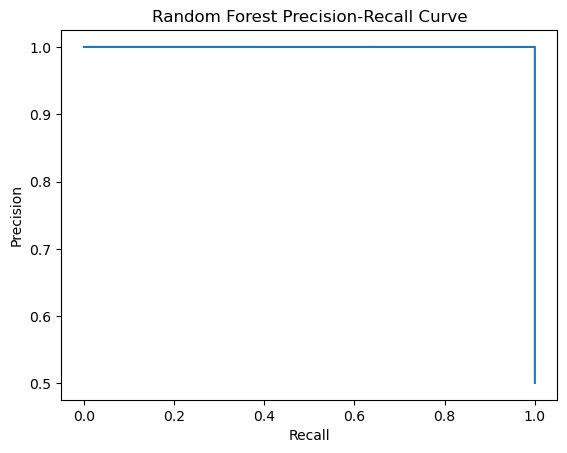

In [34]:
# Plot the precision-recall curve

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_prob_rf)
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.show()

In [35]:
# Accuracy score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf}')

Accuracy: 0.9998886211889395


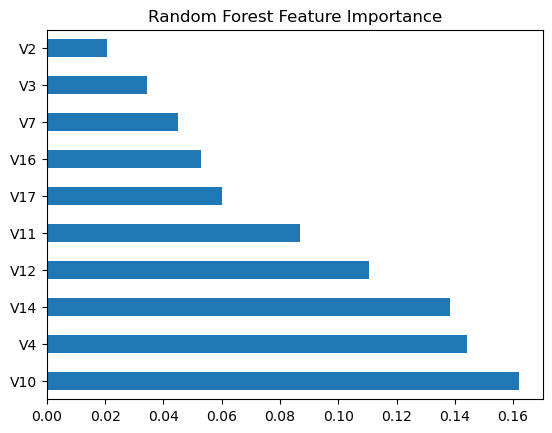

In [36]:
# Plot the feature importance

feature_importance_rf = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance_rf.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()

In [42]:
# Save the model

import pickle

pickle.dump(rf, open('../models/credit_card_fraud_rf.pkl', 'wb'))
